In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 fro

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [5]:
df.shape

(1000, 40)

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

**_c39 , Policy_number Column**

In [9]:
df.drop(['_c39'],axis=1,inplace=True)

In [10]:
df['policy_number'].nunique()

1000

In [11]:
df.drop(['policy_number'],axis=1,inplace=True)

**policy_bind_date Column**

In [12]:
df['policy_bind_date'].head(2)

0    17-10-2014
1    27-06-2006
Name: policy_bind_date, dtype: object

In [13]:
df['policy_bind_day']=df['policy_bind_date'].str.split('-').str[0].astype(int)
df['policy_bind_month']=df['policy_bind_date'].str.split('-').str[1].astype(int)
df['policy_bind_year']=df['policy_bind_date'].str.split('-').str[2].astype(int)

In [14]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

**policy_state Column**

In [15]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])

**policy_csl Column**

In [17]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [18]:
df['policy_csl']=le.fit_transform(df['policy_csl'])

**insured_sex Column**

In [19]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [20]:
df['insured_sex']=le.fit_transform(df['insured_sex'])

**insured_education_level Column**

In [21]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [22]:
df['insured_education_level']=le.fit_transform(df['insured_education_level'])

**insured_occupation Column**

In [23]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [25]:
df['insured_occupation']=le.fit_transform(df['insured_occupation'])

**insured_hobbies Column**

In [26]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [28]:
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])

**insured_relationship Column**

In [29]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [30]:
df['insured_relationship']=le.fit_transform(df['insured_relationship'])

**incident_date Column**

In [31]:
df['incident_date'].head(2)

0    25-01-2015
1    21-01-2015
Name: incident_date, dtype: object

In [32]:
df['incident_day']=df['incident_date'].str.split('-').str[0].astype(int)
df['incident_month']=df['incident_date'].str.split('-').str[1].astype(int)
df['incident_year']=df['incident_date'].str.split('-').str[2].astype(int)

In [33]:
df.drop(['incident_date'],axis=1,inplace=True)

**incident_type Column**

In [34]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [35]:
df['incident_type']=le.fit_transform(df['incident_type'])

**collision_type Column**

In [36]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [37]:
df['collision_type'].replace(['?'],['None'],inplace=True)

In [38]:
df['collision_type']=le.fit_transform(df['collision_type'])

**incident_severity Column**

In [39]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [40]:
df['incident_severity']=le.fit_transform(df['incident_severity'])

**authorities_contacted  Column**

In [41]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [42]:
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])

**incident_state , incident_city , incident_location Column**

In [43]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [44]:
df['incident_state']=le.fit_transform(df['incident_state'])

In [45]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [46]:
df['incident_city']=le.fit_transform(df['incident_city'])

In [47]:
df['incident_location'].value_counts()

4567 Pine Ave            1
9286 Oak Ave             1
4699 Texas Ridge         1
1126 Texas Hwy           1
3092 Texas Drive         1
9422 Washington Ridge    1
5812 Oak St              1
5584 Britain Lane        1
5022 1st St              1
6634 Texas Ridge         1
8576 Andromedia St       1
8097 Maple Lane          1
6678 Weaver Drive        1
3414 Elm Ave             1
3926 Rock Lane           1
9325 Lincoln Drive       1
4268 2nd Ave             1
8336 1st Ridge           1
3006 Lincoln Ridge       1
6191 Oak Lane            1
6179 3rd Ridge           1
7042 Maple Ridge         1
4985 Sky Lane            1
5431 3rd Ridge           1
9322 Rock Hwy            1
4905 Best Lane           1
5868 Sky Hwy             1
1320 Flute Lane          1
1589 Best Ave            1
2253 Maple Ave           1
                        ..
7705 Best Ridge          1
7295 Tree Hwy            1
6981 Weaver St           1
5608 Solo St             1
1454 5th Ridge           1
1491 Francis Ridge       1
6

In [48]:
df['incident_location'].head()

0       9935 4th Drive
1         6608 MLK Hwy
2    7121 Francis Lane
3     6956 Maple Drive
4         3041 3rd Ave
Name: incident_location, dtype: object

In [49]:
df.drop(['incident_location'],axis=1,inplace=True)

**property_damage , police_report_available Column**

In [50]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [51]:
df['property_damage'].replace(['?'],['None'],inplace=True)

In [52]:
df['property_damage']=le.fit_transform(df['property_damage'])

In [53]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [54]:
df['police_report_available'].replace(['?'],['None'],inplace=True)

In [55]:
df['police_report_available']=le.fit_transform(df['police_report_available'])

**auto_make , auto_model Column**

In [56]:
df['auto_make'].value_counts()

Suburu        80
Dodge         80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [57]:
df['auto_make']=le.fit_transform(df['auto_make'])

In [58]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Forrestor         28
Camry             28
F150              27
E400              27
95                27
93                25
Grand Cherokee    25
Escape            24
Maxima            24
Tahoe             24
X5                23
Ultima            23
Highlander        22
Silverado         22
Civic             22
Fusion            21
Corolla           20
TL                20
ML350             20
Impreza           20
CRV               20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [59]:
df['auto_model']=le.fit_transform(df['auto_model'])

**fraud_reported column**

In [60]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [61]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_state                   1000 non-null int32
policy_csl                     1000 non-null int32
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null int32
insured_education_level        1000 non-null int32
insured_occupation             1000 non-null int32
insured_hobbies                1000 non-null int32
insured_relationship           1000 non-null int32
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null int32
collision_type                 1000 non-null int32
incident_severity        

In [63]:
df.shape

(1000, 41)

In [64]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [65]:
from sklearn.utils import resample
df_0 = df[df['fraud_reported']==0]
df_1 = df[df['fraud_reported']==1]

df_1_ups = resample(df_1,replace=True,n_samples=753,random_state=123) 
 
df_new = pd.concat([df_0, df_1_ups])

In [66]:
df_new.shape

(1506, 41)

In [67]:
df_new['fraud_reported'].value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [68]:
x=df_new.drop(['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,23100,4,30,2007,6,9,2000,22,2,2015
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,4550,0,31,2009,6,6,2014,17,2,2015
6,137,34,1,1,1000,1333.35,0,441716,1,6,...,50050,9,29,2012,4,6,2000,13,1,2015
7,165,37,0,0,1000,1137.03,0,603195,1,0,...,32830,1,5,2015,3,2,1990,27,2,2015
8,27,33,0,0,500,1442.99,0,601734,0,6,...,22160,12,9,2012,5,2,1997,30,1,2015


In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [70]:
y=df_new['fraud_reported']
y.head()

2    0
4    0
6    0
7    0
8    0
Name: fraud_reported, dtype: int32

In [71]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56,stratify=y)

In [72]:
print(x_train.shape,x_test.shape)

(1054, 40) (452, 40)


In [73]:
print(y_train.shape,y_test.shape)

(1054,) (452,)


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [75]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [76]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [77]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Accuracy_score =  0.6592920353982301


Cross_Val_Score =  0.7060087719298245


roc_auc_score =  0.6592920353982301


classification_report
               precision    recall  f1-score   support

           0       0.70      0.55      0.62       226
           1       0.63      0.77      0.69       226

   micro avg       0.66      0.66      0.66       452
   macro avg       0.67      0.66      0.66       452
weighted avg       0.67      0.66      0.66       452



[[124 102]
 [ 52 174]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=

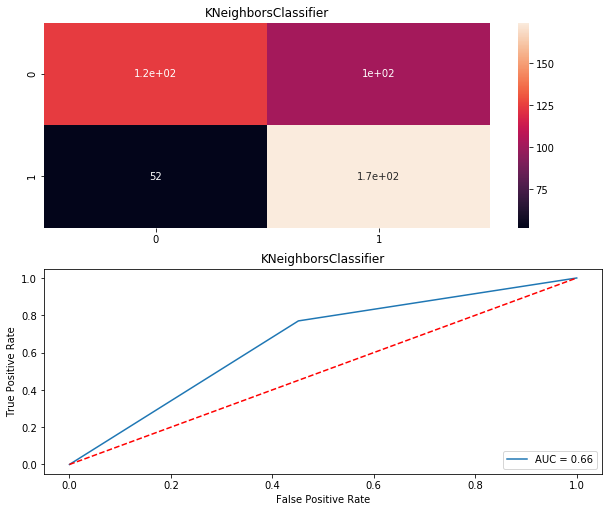

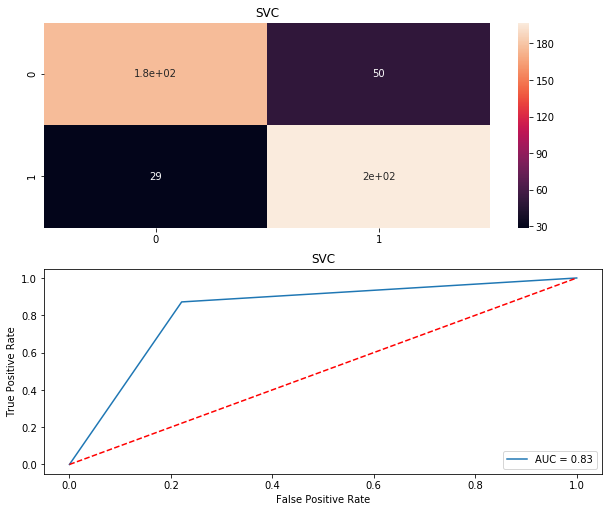

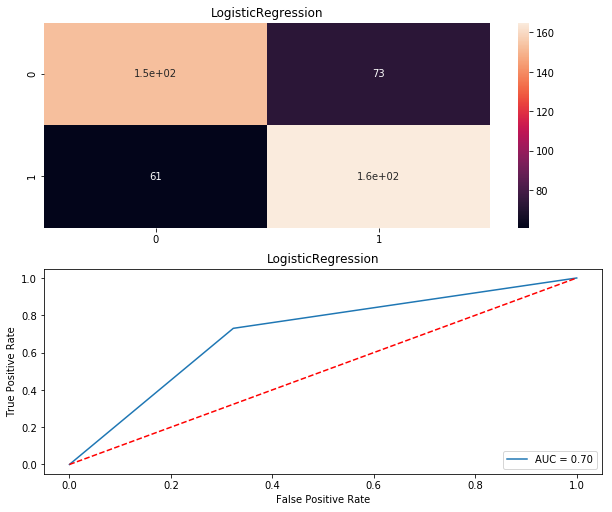

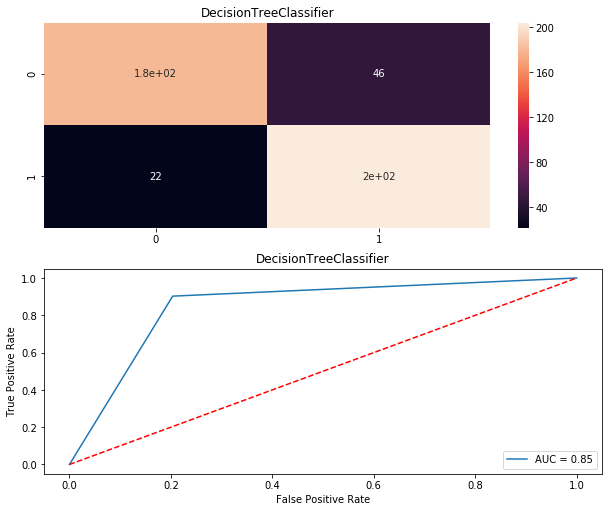

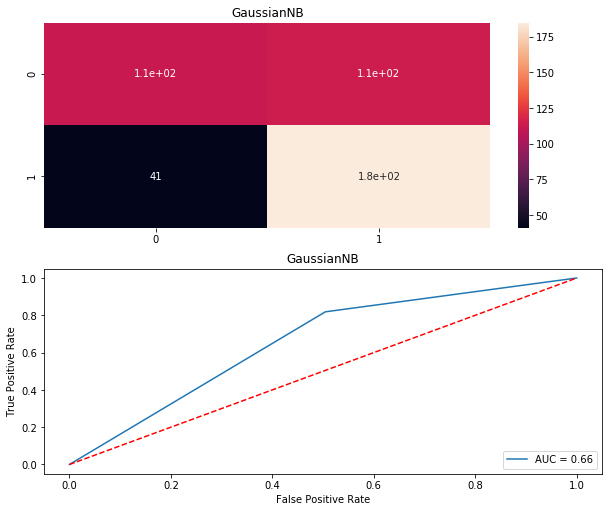

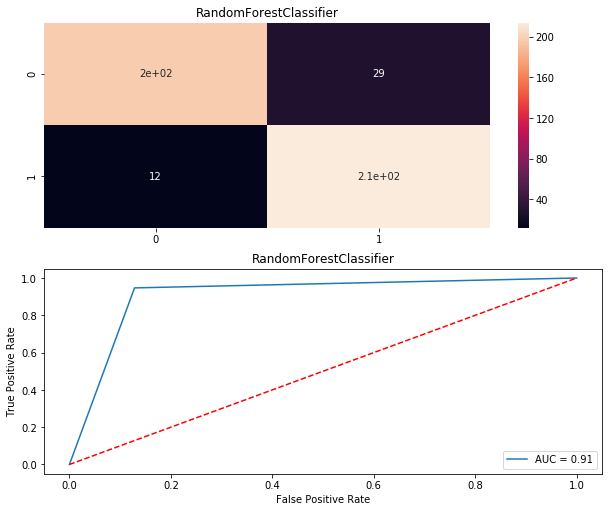

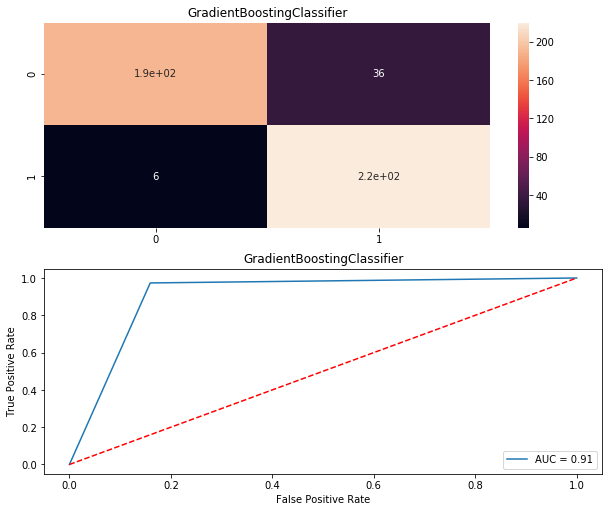

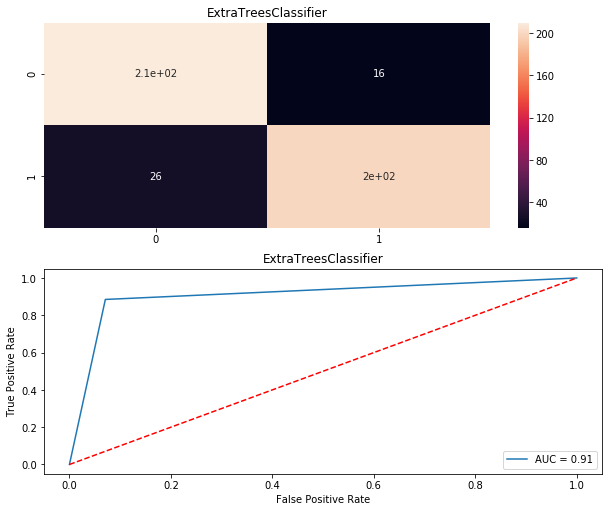

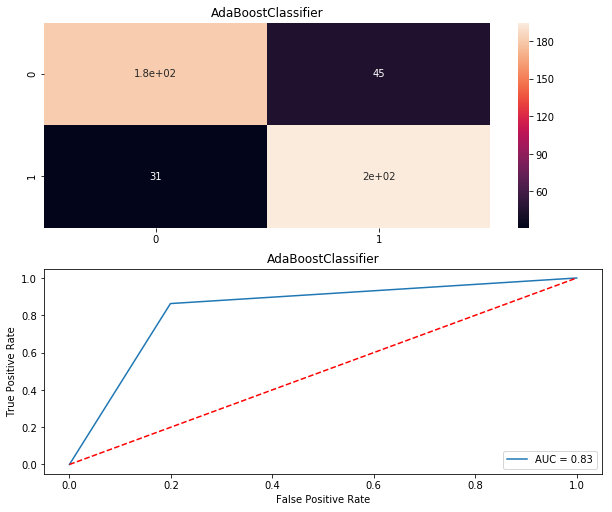

In [78]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    

In [79]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,65.929204,70.600877,65.929204
1,SVC,82.522124,85.334211,82.522124
2,LogisticRegression,70.353982,72.448246,70.353982
3,DecisionTreeClassifier,84.955752,91.035088,84.955752
4,GaussianNB,65.707965,69.528070,65.707965
5,RandomForestClassifier,90.929204,92.435965,90.929204
6,GradientBoostingClassifier,90.707965,92.632456,90.707965
7,ExtraTreesClassifier,90.707965,94.820175,90.707965
8,AdaBoostClassifier,83.185841,83.807018,83.185841



**I choose ExtraTreesClassifier as my final model because it perform very well on our dataset and also has good accuracy_score and Cross_val_score**

Accuracy_score = 90.707965

Cross_val_score = 94.820175

Roc_auc_curve = 90.707965

In [80]:
from sklearn.externals import joblib
joblib.dump(SV,"model_Insurance_fraud.csv")

['model_Insurance_fraud.csv']

In [81]:
model=joblib.load("model_Insurance_fraud.csv")
model.predict(x_test)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,